<a href="https://colab.research.google.com/github/isaacsgabe/School/blob/main/ML/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bring in imports
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
#load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# use the last 2 attrributes because those are the most telling (petal width and length)
x = iris["data"][:, 2:] # petal width

#seperate the data into either iris Virginica or not iris Virginica 
y = (iris["target"] == 0).astype(int) # 1 if Iris-Virginica, else 0
colormap = iris.target_names
for i in range(len(colormap)):
  if colormap[i] == 'setosa':
    colormap[i] = 'r'
  else:
    colormap[i] = 'b'



array(['r', 'b', 'b'], dtype='<U10')

**Pre-Processing**

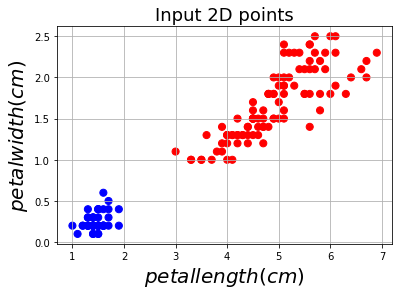

In [ ]:
#visualize the data before we start the logistic regression
def plot_scatter(X, y, colormap, path):
  plt.grid()
  plt.xlabel('$petal length (cm)$', size=20)
  plt.ylabel('$petal width (cm)$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])
  plt.savefig(path)
plot_scatter(x, y, colormap, 'image.png')

In [ ]:
#this will be our binary classification if the flower is an iris Virginica or not
sigmoid = lambda x: 1/(1+np.exp(-x))

w = np.array([6.33, -4.22])   # some magical w
b = 1.99                      # some magical b
#test on a point that we know is an iris Virginica
z = np.array([5.1, 3.5])     # point we want to classify

print(sigmoid(w.dot(z) + b))

0.9999999966119117


## **Gradient** **Descent**

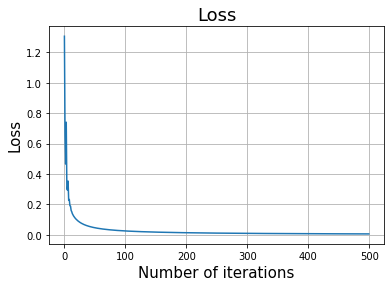

In [ ]:
# how big will our steps be to find the optimal weights
LEARNING_RATE = 2
#how many times will we go trough each data point to try and readjust the data
NUM_EPOCHS = 500

#our loss function to see if we have found good weights yet
def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

#a more computer based way to do the same math
def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) + (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([-3.0, 2.0])
b = 0.0

for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0


  for j in range(x.shape[0]):
    #take the current point points pedal length and width
    x_j = x[j,:]
    #get whether the flower is an iris Virginica or not
    y_j = y[j]
    #get our e^-z value
    z_j = w.dot(x_j) + b
    #plot it and see if our value is above .5 or not
    a_j = sigmoid(z_j)

    #see how close we were to the right answer
    loss_j = get_loss_numerically_stable(y_j, z_j)


    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    
    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have 150 samples
  dw = (1.0/150) * dw
  db = (1.0/150) * db
  loss = (1.0/150) * loss

  #make out steps smaller as we get close
  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db
  
  #add our numbers to the cache
  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)

[ 3.30349837 -6.65516379]
[ 3.30349837 -6.65516379]


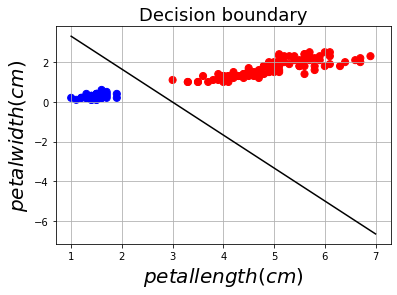

In [ ]:
def plot_decision_boundary(X, y, w, b, path):
   plt.grid()
   plt.xlabel('$petal length (cm)$', size=20)
   plt.ylabel('$petal width (cm)$', size=20)
   plt.title('Decision boundary', size = 18)
   xs = np.array([1, 7.0])
   ys = (-w[0] * xs - b)/w[1]
   plt.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
   plt.plot(xs, ys, c='black')
   plt.savefig(path)

#using our optimal weights, plot our data with a line to visualize the classification
plot_decision_boundary(x, y, w_cache[-1], b_cache[-1], 'image.png')